In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

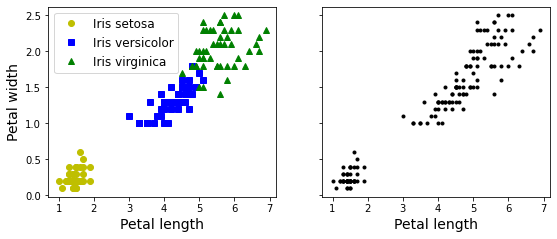

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [4]:
# Gaussian mixture to separate with petal length & width and sepal length & width
from sklearn.mixture import GaussianMixture

In [5]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

In [6]:
from scipy import stats
# map each cluster to a class
mapping = {}
for class_id in np.unique(y):
#     print(class_id)
    # status mode picks most common class for each cluster
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

In [7]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
# print(y_pred)

In [8]:
# X

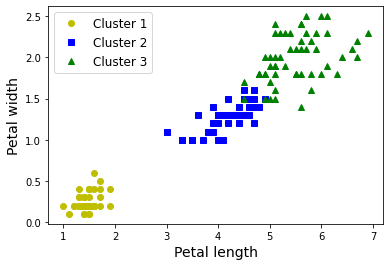

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()


In [10]:

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [12]:


def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

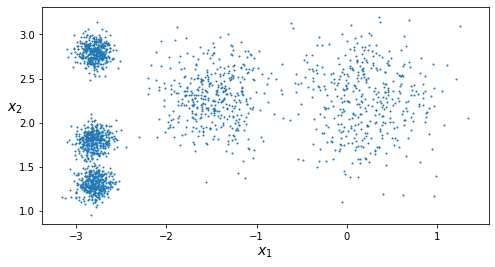

In [13]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [14]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [15]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [16]:
y_pred is kmeans.labels_

True

In [17]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [18]:

X_new = np.array([[0, 2], [1, 2], [-1, 4], [-3, 5]])
kmeans.predict(X_new)

array([1, 1, 3, 2])

In [19]:
# soft clustering
# displays distance from centroids
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [3.80908853, 0.83147037, 3.87561396, 2.48330311, 3.86415653],
       [2.8440905 , 2.12234346, 2.15942789, 1.77656881, 3.24451805],
       [3.20482545, 4.22236512, 2.21329963, 3.11725939, 3.7045567 ]])

In [20]:
# if you know approx. centroids
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
ikmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

# n_init = number of random initializations

In [21]:
y_predict = ikmeans.fit_predict(X)

In [22]:
kmeans.inertia_
# metric it uses for each instance is inertia

211.5985372581683

In [23]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

# mini batches. If does not fit in memory, can use memmap or partial_fit

MiniBatchKMeans(n_clusters=5)

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [37]:
# download the ladybug image
import os
import urllib.request


PROJECT_ROOT_DIR = os.path.dirname(os.path.abspath(os.curdir))
images_path = os.path.join(".", "images", "unsupervised_learning")
# print(images_path)
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x25bffdb10a0>)

In [40]:
# clustering for image segmentation

from matplotlib.image import imread
image = imread(os.path.join(".", "images", "unsupervised_learning", "ladybug.png"))

In [41]:
image.shape

(533, 800, 3)